In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from ipywidgets import interact, SelectionSlider, IntSlider

In [2]:
%time df_c_before = pd.read_csv('c_before.csv')
%time df_c_after = pd.read_csv('c_after.csv')

CPU times: user 4.28 s, sys: 282 ms, total: 4.57 s
Wall time: 4.67 s
CPU times: user 4.27 s, sys: 267 ms, total: 4.53 s
Wall time: 4.67 s


In [3]:
%time df_jval = pd.read_csv('jval.csv')
%time df_phy = pd.read_csv('phy.csv')

CPU times: user 1.84 s, sys: 133 ms, total: 1.98 s
Wall time: 2.03 s
CPU times: user 66.1 ms, sys: 10.3 ms, total: 76.4 ms
Wall time: 77.3 ms


# Species concentration

## Probability distribution

In [4]:
df_c_des = df_c_before.describe(percentiles=[0.1, 0.9])
df_c_des

,CH2I2,CH2ICl,CH2IBr,AERI,INDIOL,ISALA,ISALC,ISN1OA,ISN1OG,LVOCOA,...,HCl,O1D,Cl,O,NO3,NO2,O3,HO2,ClO,OH
count,6.624000e+04,6.624000e+04,6.624000e+04,6.624000e+04,6.624000e+04,6.624000e+04,6.624000e+04,6.624000e+04,6.624000e+04,6.624000e+04,...,6.624000e+04,66240.000000,6.624000e+04,6.624000e+04,6.624000e+04,6.624000e+04,6.624000e+04,6.624000e+04,6.624000e+04,6.624000e+04
mean,6.487180e+04,8.265856e+05,1.184361e+05,2.236469e+06,2.948808e+08,5.551042e+05,3.453855e+04,1.502661e+06,1.598703e+06,5.705948e+06,...,1.211871e+08,0.005955,1.038517e+02,1.943931e+03,5.179532e+07,1.085455e+09,6.429658e+11,1.092573e+08,1.046195e+05,1.138182e+06
std,2.320986e+05,1.334114e+06,2.774439e+05,3.116154e+06,5.975936e+08,8.744156e+05,1.181969e+05,3.135485e+06,5.820087e+06,1.252552e+07,...,1.361124e+08,0.012744,1.924307e+02,3.084058e+03,2.542684e+08,7.600969e+09,2.347400e+11,1.544861e+08,1.580009e+05,2.186656e+06
min,5.861059e-247,7.247217e-24,0.000000e+00,1.901510e+04,1.582311e+05,2.657974e+03,1.074698e+00,1.002195e+03,1.968380e-90,1.313239e+04,...,3.511337e+03,0.000000,5.051296e-225,7.921636e-18,3.577743e+02,5.874541e+04,2.548948e+10,1.210570e+03,8.569365e-176,9.994697e-01
10%,4.944903e-12,3.101306e-01,4.508867e-06,1.689599e+05,4.227210e+06,6.964563e+04,4.783268e+02,2.956973e+04,2.259017e+00,1.419996e+05,...,3.736527e+05,0.000000,6.761750e-03,1.147963e-12,5.313390e+03,1.597967e+07,4.095772e+11,1.552354e+05,5.086997e+02,2.443045e+02
50%,3.297958e+02,1.147054e+05,5.651001e+03,1.183046e+06,5.759583e+07,3.058368e+05,6.410407e+03,3.404753e+05,1.021993e+04,1.633520e+06,...,8.783473e+07,0.000007,2.321465e+00,6.959124e+00,7.058169e+04,1.744745e+08,6.052930e+11,1.645886e+07,1.881974e+04,3.992276e+04
90%,1.697929e+05,2.538578e+06,3.424215e+05,4.960430e+06,8.132999e+08,1.222294e+06,5.505950e+04,4.252415e+06,3.773255e+06,1.488989e+07,...,3.173188e+08,0.020263,3.592422e+02,5.876272e+03,6.690796e+07,1.667201e+09,9.337423e+11,3.347223e+08,3.153608e+05,3.895947e+06
max,8.439036e+06,2.913612e+07,8.295880e+06,3.162864e+07,8.340623e+09,2.881143e+07,1.851046e+06,4.618493e+07,1.729234e+08,2.564545e+08,...,8.349516e+08,0.124706,1.675662e+03,3.660962e+04,8.129207e+09,8.320347e+11,2.515545e+12,1.082051e+09,1.429909e+06,2.893635e+07


In [5]:
df_skew_c = df_c_before.skew().sort_values(ascending=False)
df_skew_c.head(20)

IONO       69.142025
PRN1       63.169815
PRPN       59.351082
Cl2O2      58.026099
NO2        54.306070
IMAO3      52.854761
TRO2       46.183954
MTPO       45.234681
N2O5       44.705869
LIMO       43.759900
MTPA       42.420839
LIMO2      38.330014
ISNOOB     37.164378
ROH        36.978018
XRO2       35.786083
PIO2       35.512878
CH3CHOO    31.896929
DIBOO      30.939219
MONITU     29.831628
MPN        28.969146
dtype: float64

In [6]:
@interact(var=SelectionSlider(options=df_skew_c.index, continuous_update=False))
def plot_dist(var):

    fig, axes = plt.subplots(1, 2, figsize=[12, 4])
    axes[0].hist(df_c_before[var],  alpha=0.4, label='before')
    axes[0].hist(df_c_after[var], alpha=0.4, label='after')
    axes[0].legend()
    
    axes[0].axvline(df_c_des[var]['10%'], c='k')
    axes[0].axvline(df_c_des[var]['90%'], c='k')

    axes[1].hist(df_c_before[var], log=True, alpha=0.4)
    axes[1].hist(df_c_after[var], log=True, alpha=0.4)
    
    fig.suptitle('{0}, skewness = {1}'.format(var, df_skew_c[var]))

interactive(children=(SelectionSlider(continuous_update=False, description='var', options=('IONO', 'PRN1', 'PR…

In [7]:
@interact(var=SelectionSlider(options=df_c_before, continuous_update=False))
def plot_change(var):
    
    from statsmodels.graphics.gofplots import qqplot_2samples
    
    fig, axes = plt.subplots(1, 2, figsize=[12, 4])
    axes[0].scatter(df_c_before[var], df_c_after[var], alpha=0.2, s=2, label='after')
    axes[0].scatter(df_c_before[var], df_c_after[var]-df_c_before[var], alpha=0.2, s=2, label='tendency')
    axes[0].legend()
    
    # overall probablity distribution is almost unchanged
    qqplot_2samples(df_c_before[var], df_c_after[var], ax=axes[1])
    
    fig.suptitle('{0}'.format(var, df_skew_c[var]))

interactive(children=(SelectionSlider(continuous_update=False, description='var', options=('CH2I2', 'CH2ICl', …

## Correlation

In [8]:
%%time
df_c_corr = df_c_before.corr()

CPU times: user 4.5 s, sys: 56.9 ms, total: 4.56 s
Wall time: 4.65 s


In [9]:
df_c_corr.head()

,CH2I2,CH2ICl,CH2IBr,AERI,INDIOL,ISALA,ISALC,ISN1OA,ISN1OG,LVOCOA,...,HCl,O1D,Cl,O,NO3,NO2,O3,HO2,ClO,OH
CH2I2,1.000000,0.713462,0.894886,0.029512,0.037064,0.184004,0.038327,0.069486,0.034107,0.021184,...,-0.063014,-0.106500,-0.110347,-0.148531,0.123336,0.125625,0.009970,-0.131698,-0.142715,-0.101041
CH2ICl,0.713462,1.000000,0.908321,-0.158707,-0.123515,0.176408,-0.047983,-0.088749,-0.049043,-0.124137,...,-0.320874,-0.211150,-0.207733,-0.278596,0.003022,0.056233,-0.122986,-0.245528,-0.216008,-0.181304
CH2IBr,0.894886,0.908321,1.000000,-0.046782,-0.029444,0.191332,0.001746,0.005670,-0.001486,-0.036392,...,-0.162946,-0.166245,-0.165211,-0.211317,0.073051,0.102264,-0.045229,-0.197758,-0.174539,-0.153013
AERI,0.029512,-0.158707,-0.046782,1.000000,0.523352,0.530357,0.574213,0.577182,0.294738,0.557723,...,0.569258,0.051388,0.076431,0.062960,0.240126,0.101672,0.212913,0.141253,0.004524,0.084018
INDIOL,0.037064,-0.123515,-0.029444,0.523352,1.000000,0.212159,0.262079,0.941074,0.559763,0.820088,...,0.319290,0.126604,0.032256,0.148531,0.248445,0.146206,0.475270,0.156200,-0.032626,0.089212


In [10]:
df_c_before['SO4H1'].max()

0.0

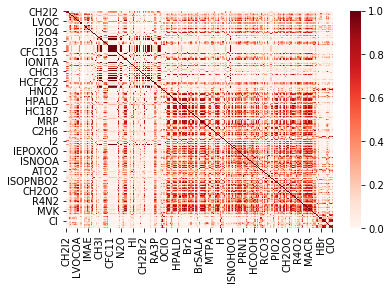

In [11]:
sns.heatmap(df_c_corr, vmin=0, vmax=1, cmap='Reds')

# Jvals

In [12]:
df_jval_des = df_jval.describe()
df_jval_des

,1/O2/O2,2/O3/O3,3/O3/O3(1D),6/NO/NO,7/CH2O/H2COa,8/CH2O/H2COb,9/H2O2/H2O2,10/MP/CH3OOH,11/NO2/NO2,12/NO3/NO3,...,121/IONO2/IONO2,122/I2O2/I2O2,123/CH3I/CH3I,124/CH2I2/CH2I2,125/CH2ICl/CH2ICl,126/CH2IBr/CH2IBr,127/I2O4/I2O2,128/I2O3/I2O3,129/IBr/IBr,130/ICl/ICl
count,6.624000e+04,6.624000e+04,6.624000e+04,6.624000e+04,6.624000e+04,6.624000e+04,6.624000e+04,6.624000e+04,66240.000000,66240.000000,...,66240.000000,66240.000000,6.624000e+04,66240.000000,6.624000e+04,6.624000e+04,66240.000000,66240.000000,66240.000000,66240.000000
mean,3.146392e-23,1.747627e-04,7.114664e-06,7.397172e-21,1.041820e-05,1.700476e-05,2.177038e-06,1.766407e-06,0.003313,0.077063,...,0.003438,0.016256,1.755166e-06,0.002683,4.356593e-05,1.540992e-04,0.016256,0.014323,0.033050,0.010531
std,1.222728e-21,2.142729e-04,1.346757e-05,2.810189e-19,1.495635e-05,2.322146e-05,3.089548e-06,2.444650e-06,0.004285,0.093968,...,0.004515,0.021180,2.669681e-06,0.003724,6.330642e-05,2.201932e-04,0.021180,0.018272,0.040204,0.012834
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.042390e-32,8.311273e-07,9.663448e-09,1.712309e-30,4.209816e-08,9.787369e-08,1.076910e-08,1.007236e-08,0.000030,0.000362,...,0.000027,0.000099,6.625537e-09,0.000015,2.042169e-07,7.509635e-07,0.000099,0.000098,0.000163,0.000055
75%,4.979535e-27,3.885626e-04,7.361083e-06,2.832742e-25,1.957647e-05,3.422640e-05,4.116939e-06,3.466998e-06,0.007072,0.171123,...,0.007213,0.033953,2.933217e-06,0.005257,7.880984e-05,2.880934e-04,0.033953,0.030616,0.074268,0.023613
max,1.290387e-19,8.399320e-04,8.182655e-05,3.132245e-17,6.753271e-05,1.032846e-04,1.366264e-05,1.083354e-05,0.017753,0.358782,...,0.019189,0.088982,1.258204e-05,0.016485,2.863845e-04,9.808105e-04,0.088982,0.074659,0.155274,0.049692


In [13]:
%%time
df_jval_corr = df_jval.corr()

CPU times: user 1.37 s, sys: 7.11 ms, total: 1.37 s
Wall time: 1.37 s


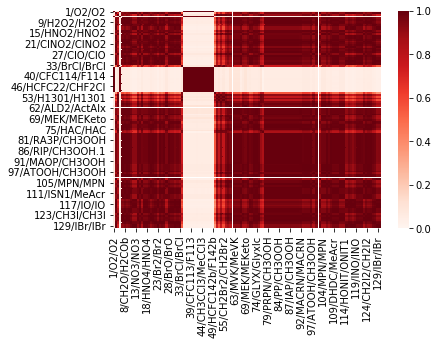

In [14]:
sns.heatmap(df_jval_corr, vmin=0, vmax=1, cmap='Reds')

In [15]:
@interact(start = IntSlider(min=0, max=df_jval.shape[1]-2, continuous_update=False),
          end = IntSlider(min=1, max=df_jval.shape[1]-1, continuous_update=False),)
def plot_corrmat(start, end):
    sns.heatmap(df_jval_corr.iloc[start:end, start:end], vmin=0, vmax=1, cmap='Reds')

interactive(children=(IntSlider(value=0, continuous_update=False, description='start', max=120), IntSlider(val…

In [16]:
@interact(var1 = SelectionSlider(options=df_jval.columns, continuous_update=False),
          var2 = SelectionSlider(options=df_jval.columns, continuous_update=False))
def plot_jval_corr(var1, var2):
    df_jval.plot.scatter(x=var1, y=var2, alpha=0.2, s=2)
    plt.xlim(df_jval[var1].min(), df_jval[var1].max())
    plt.ylim(df_jval[var2].min(), df_jval[var2].max())
    plt.title('corr={}'.format(df_jval_corr[var1][var2]))

interactive(children=(SelectionSlider(continuous_update=False, description='var1', options=('1/O2/O2', '2/O3/O…